In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from torch.utils.data import DataLoader
import torch



/home/mayag88/mayag88/miniconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from utils_mnist import (
    non_iid_train_iid_test,
)

2023-11-20 14:47:32,757	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [4]:
trainsets, valsets = non_iid_train_iid_test()


[2000, 2000, 2000, 2000, 2000]


In [5]:
# Assuming you have a DataLoader 'data_loader' that provides your input data X
# Example: DataLoader(dataset, batch_size=32, shuffle=True)
# Make sure to replace this with your actual DataLoader setup
from sklearn.decomposition import PCA

# Create a sample DataLoader for illustration
data_loader = valsets[-1]

# Extract data from DataLoader
X = torch.cat([batch.reshape(-1,28*28) for batch, _ in data_loader]).numpy()
from sklearn.mixture import GaussianMixture as mix

# model = mix(
#     n_components=10,
#     init_params="kmeans",
#     n_init=5,
#     max_iter=5000,
#     covariance_type="diag",
# )
# model.fit(X)

# preds = model.predict(X)


In [6]:
gm = GaussianMixture(n_components=10, random_state=0).fit(X)

In [7]:
len(gm.means_)

10

In [8]:
gm.means_.shape

(10, 784)

In [9]:
X.shape

(2000, 784)

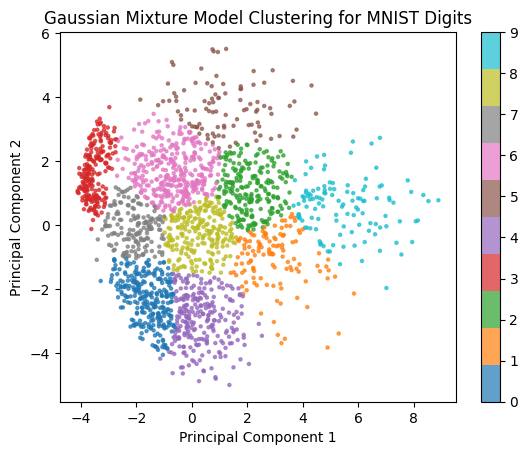

In [10]:
# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(X_pca)

# Predict cluster labels
labels = gmm.predict(X_pca)

# Plot the data points and cluster assignments
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="tab10", s=5, alpha=0.7)
plt.title("Gaussian Mixture Model Clustering for MNIST Digits")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

In [ ]:
# Predict cluster labels
labels = gmm.predict(X)

# Plot the data points and cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=50, alpha=0.7)
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()